Statistics of Data:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000 

Number of null Values in data per column: 
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64 

Aggrigate data of two columns (Duration, Calories) : 
          Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244 

Data with calories between 500 and 1000: 
      Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135  

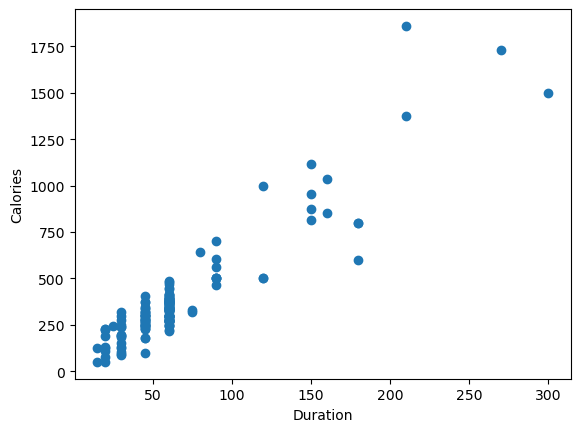

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('C:\\Neural networks\\data.csv')
#Show the basic statistical description about the data
print("Statistics of Data:\n{} \n".format(df.describe()))
# Check for null values
print("Number of null Values in data per column: \n{} \n".format(df.isnull().sum()))
# Replace null values with the mean
df.fillna(df.mean(), inplace=True)
#Select at least two columns and aggregate the data using: min, max, count, mean.
cols = ['Duration', 'Calories']
agg = df[cols].agg(['min', 'max', 'count', 'mean'])
print("Aggrigate data of two columns (Duration, Calories) : \n {} \n".format(agg))
# Filter data with calories between 500 and 1000
df_500_1000 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print("Data with calories between 500 and 1000: \n {} \n".format(df_500_1000))
# Filter data with calories > 500 and pulse < 100
df_500_pulse = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print("Data with calories > 500 and pulse < 100: \n {} \n".format(df_500_pulse))
# Create new dataframe without "Maxpulse" column
df_modified = df.drop('Maxpulse', axis=1)
# Delete "Maxpulse" column from the main df dataframe
df.drop('Maxpulse', axis=1, inplace=True)
# Convert "Calories" column to int datatype
df['Calories'] = df['Calories'].astype(int)
# Scatter plot for "Duration" and "Calories"

plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

Mean Squared Error:  21026037.329511296


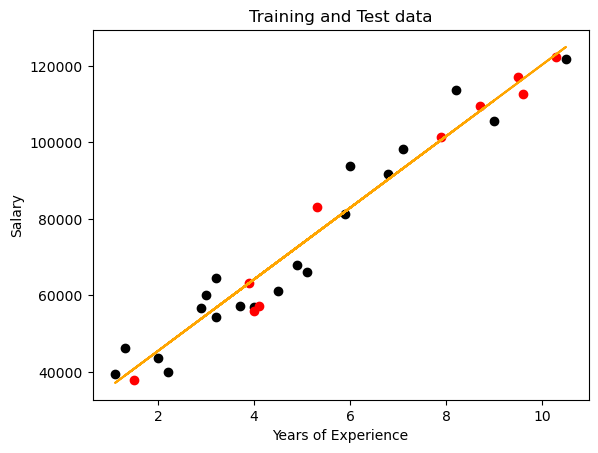

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Import the data
df = pd.read_csv("C:\\Neural networks\\Salary_Data (2).csv")
#Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset
X = df[['YearsExperience']]
y = df[['Salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
# Train and predict the model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Visualize the train and test data using scatter plot
plt.scatter(X_train, y_train, color='black')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, reg.predict(X_train), color='orange')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Training and Test data')
plt.show()